# Spatio-Temporal Traffic Forecasting with Neural Graph Cellular Automata
Petrônio C.  L. Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Omid Orang  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-4077-3775" href="https://orcid.org/0000-0002-4077-3775" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>, Lucas Astore, Frederico G. Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span>

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br


## Imports

In [1]:
import torch
from torch import nn

from st_nca.common import resume, get_device, checkpoint_all

from st_nca.cellmodel import CellModel, load_config, get_config
from st_nca.gca import GraphCellularAutomata, timestamp_generator
from st_nca.finetune import FineTunningDataset, finetune_loop
from st_nca.evaluate import evaluate, diff_states

## Data

In [3]:
DEVICE = get_device()
DTYPE = torch.float32
DEFAULT_PATH = 'C:\\Users\\petro\\Dropbox\\Projetos\\futurelab\\posdoc\\st_nca\\st_nca\\st_nca\\'
#DEFAULT_PATH = 'D:\\Dropbox\\Projetos\\futurelab\\posdoc\\st_nca\\st_nca\\st_nca\\'
DATA_PATH = DEFAULT_PATH + 'data\\PEMS03\\'
MODELS_PATH = DEFAULT_PATH + 'weights\\PEMS03\\'

STEPS_AHEAD = 12
ITERATIONS = 1

pems = PEMS03(edges_file = DATA_PATH + 'edges.csv', nodes_file = DATA_PATH + 'nodes.csv', data_file = DATA_PATH + 'data.csv',
    device = DEVICE, dtype = DTYPE, steps_ahead = STEPS_AHEAD)

DEVICE


'cuda'

In [12]:
save_as(MODELS_PATH + 'cm3x16x1024_smape25.h5', MODELS_PATH + 'cm3x16x1024_smape25.pt', pems, 3, 16, 1024, nn.GELU(), 3, 1024, nn.GELU())

In [4]:
model, pems = setup(MODELS_PATH + 'cm3x16x1024_h1_smape25.pt', pems, DEVICE)
model.dtype

{'num_heads': 16, 'normalization': <class 'torch.nn.modules.normalization.LayerNorm'>, 'pre_norm': False, 'transformer_feed_forward': 1024, 'transformer_activation': GELU(approximate='none'), 'num_tokens': 7, 'dim_token': 7, 'num_transformers': 3, 'feed_forward': 3, 'feed_forward_dim': 1024, 'feed_forward_activation': GELU(approximate='none'), 'device': 'cpu', 'dtype': torch.float32, 'steps_ahead': 12}


C:\Users\petro\AppData\Local\Temp\ipykernel_22152\4270040042.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_config = torch.load(file)


torch.float32

In [6]:
from st_nca.finetune import FineTunningDataset, finetune_loop

model, pems = setup(MODELS_PATH + 'cm3x16x1024_h1_smape25.pt', pems, DEVICE)

gca = GraphCellularAutomata(device=model.device, dtype=model.dtype, graph = pems.G,
                            max_length = pems.max_length, token_size=pems.token_dim,
                            tokenizer=pems.tokenizer, cell_model = model)

#finetune_ds = FineTunningDataset(pems, increment_type='minutes', increment=5, 
finetune_ds = FineTunningDataset(pems, increment_type='minutes', increment=5, 
                                 steps_ahead=1, step=250)

#X,_ = finetune_ds[0]
#y,_ = finetune_ds[1]

#p = gca.run_dict(X, ITERATIONS,increment_type='minute', increment=5)

#diff_states(y, p[0])

#finetune_ds[0]

{'num_heads': 16, 'normalization': <class 'torch.nn.modules.normalization.LayerNorm'>, 'pre_norm': False, 'transformer_feed_forward': 1024, 'transformer_activation': GELU(approximate='none'), 'num_tokens': 7, 'dim_token': 7, 'num_transformers': 3, 'feed_forward': 3, 'feed_forward_dim': 1024, 'feed_forward_activation': GELU(approximate='none'), 'device': 'cpu', 'dtype': torch.float32, 'steps_ahead': 12}


C:\Users\petro\AppData\Local\Temp\ipykernel_29344\4270040042.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_config = torch.load(file)


## Fine Tunning

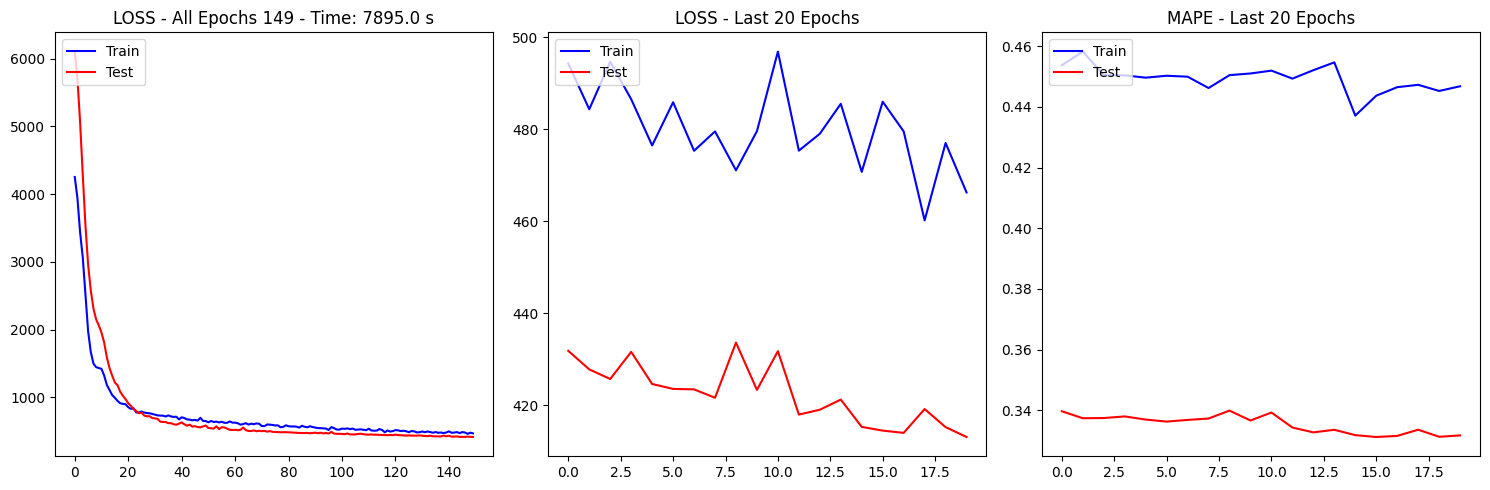

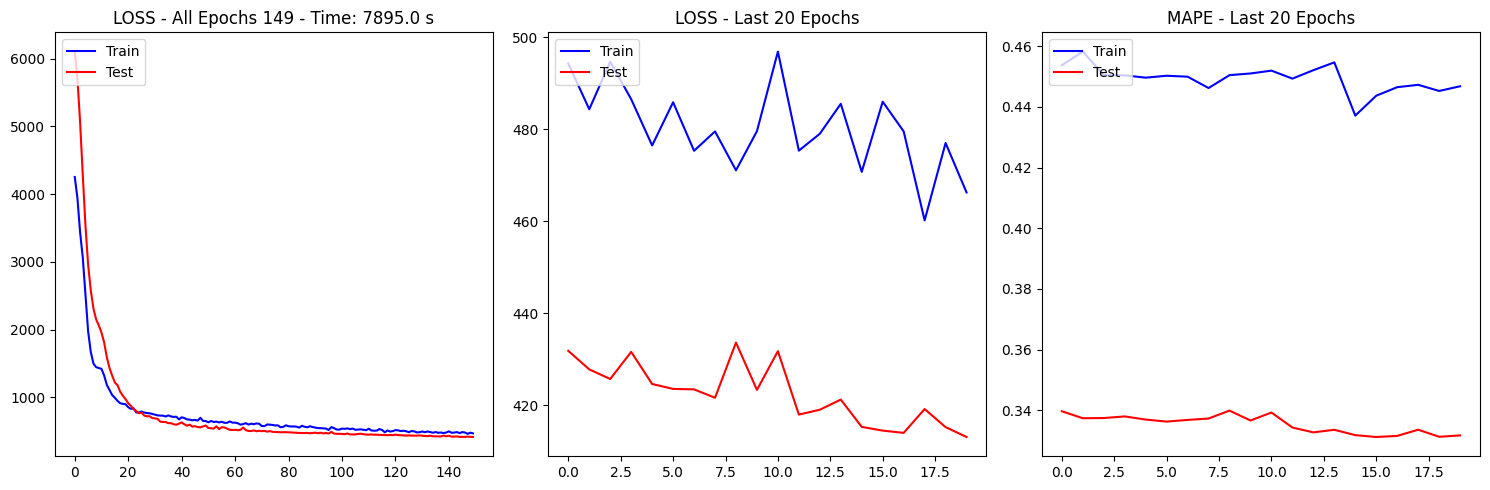

In [7]:
finetune_loop(DEVICE, finetune_ds, gca, 
              iterations = 1, increment_type='minutes', increment=5,
              #iterations = 1, increment_type='hours', increment=1,
              epochs = 150, batch = 1, lr = 0.00001,
              checkpoint_file =  MODELS_PATH + 'gca3x16x1024_h1_smape25.pt')

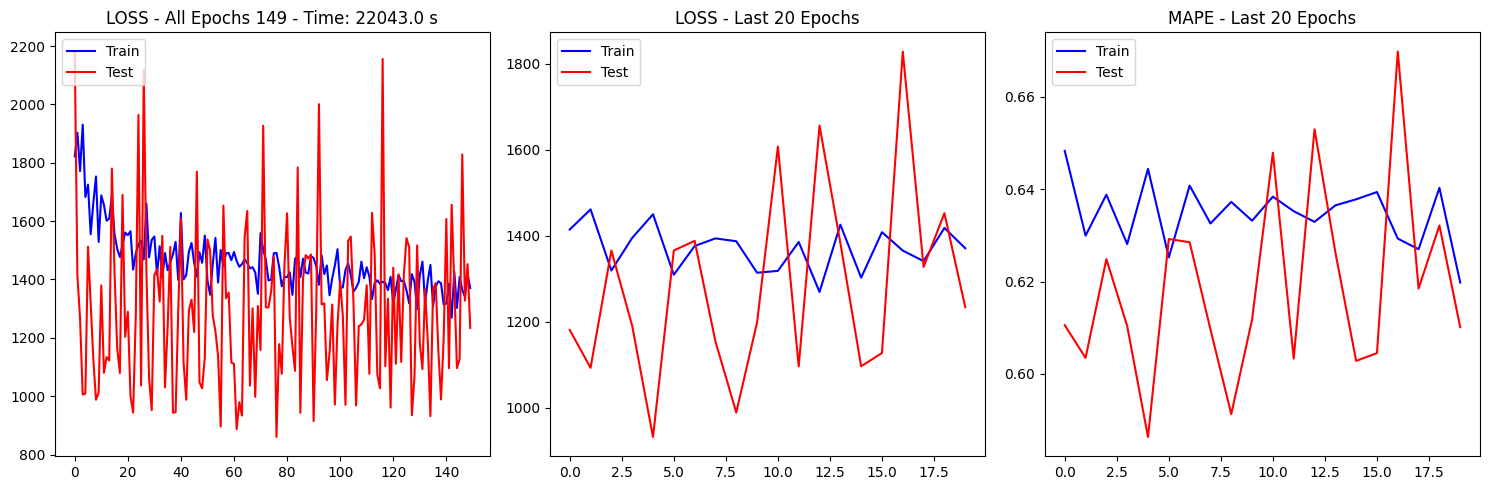

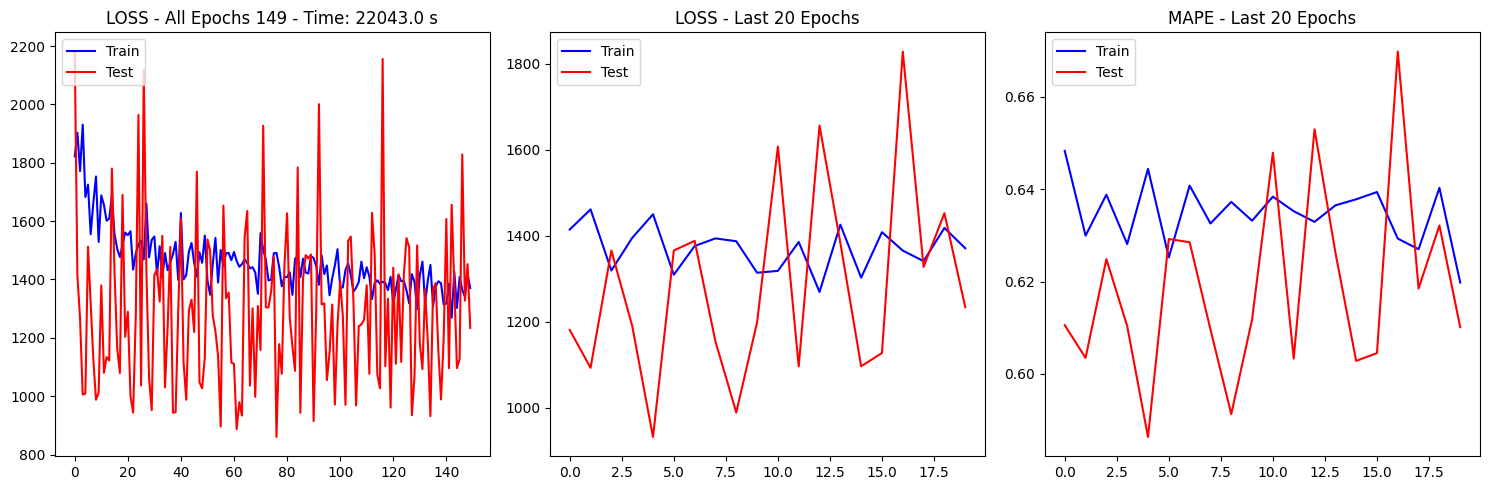

In [8]:
finetune_ds = FineTunningDataset(pems, increment_type='minutes', increment=5, 
                                 steps_ahead=12, step=250)
finetune_loop(DEVICE, finetune_ds, gca, 
              iterations = 12, increment_type='minutes', increment=5,
              #iterations = 1, increment_type='hours', increment=1,
              epochs = 150, batch = 1, lr = 0.00001,
              checkpoint_file =  MODELS_PATH + 'gca3x16x1024_h1_smape25.pt')

## Evaluate

In [ ]:
gca_file = MODELS_PATH + 'gca_{}_{}_{}_{}_{}.ptBEST'.format(NTRANSF,NHEADS,NTRANSFF,MLP,MLPD)

cell_model = CellModel(num_tokens = pems.max_length, dim_token = pems.token_dim,
               num_transformers = NTRANSF, num_heads = NHEADS, feed_forward = NTRANSFF, 
               transformer_activation = TRANSFACT,
               mlp = MLP, mlp_dim = MLPD, mlp_activation = MLPACT,
               device = DEVICE, dtype = DTYPE)

gca = GraphCellularAutomata(device=DEVICE, dtype=DTYPE, graph = pems.G,
                            max_length = pems.max_length, token_size=pems.token_dim,
                            tokenizer=pems.tokenizer, cell_model = cell_model)


gca.load_state_dict(torch.load(gca_file, 
                                 weights_only=True,
                                 map_location=torch.device(get_device())), strict=False)

ITERATIONS = 12

dataset = FineTunningDataset(pems, increment_type='minutes', increment=5, 
                                 steps_ahead=ITERATIONS, step=10, device = DEVICE)


df = evaluate(dataset.test(), gca, ITERATIONS, increment_type='minutes', increment=5)
df

In [ ]:
DEVICE